In [7]:
#Forcasting Time Series Data
# Ridership of Chicago's Transit Authority (CTA)

import pandas as pd
from pathlib import Path

path = Path('datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals_20240216.csv')
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ['date', 'day_type', 'bus', 'rail', 'total'] # shorter column names
df = df.sort_values(by='date').set_index('date')
df = df.drop("total", axis=1) # drop the total column, it's just bus + rail
df = df.drop_duplicates() # drop duplicate rows (2012-10 and 2012-7 are listed twice)


In [11]:
df.head()

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


In [12]:
df.tail()

,day_type,bus,rail
date,,,
2023-10-27,W,503840,373004
2023-10-28,A,360484,275006
2023-10-29,U,250473,185823
2023-10-30,W,551840,367453
2023-10-31,W,520069,390110


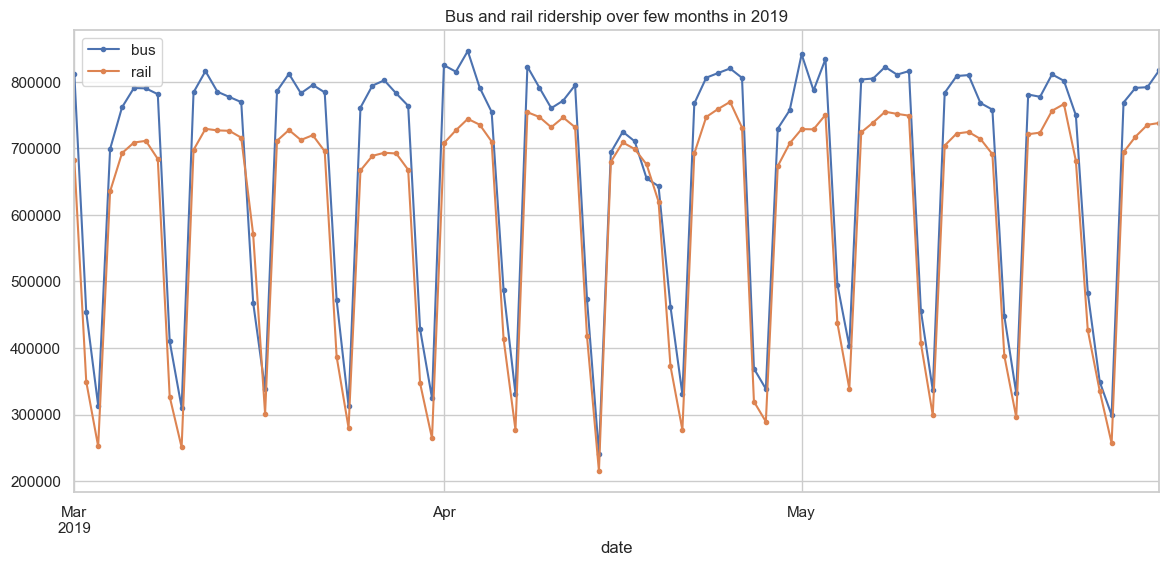

In [16]:
# Plotting bus and rail ridership over few months in 2019
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 6))
df['2019-03':'2019-05'].plot(ax=ax, marker='o', markersize=3)
ax.set_title('Bus and rail ridership over few months in 2019')
plt.show()


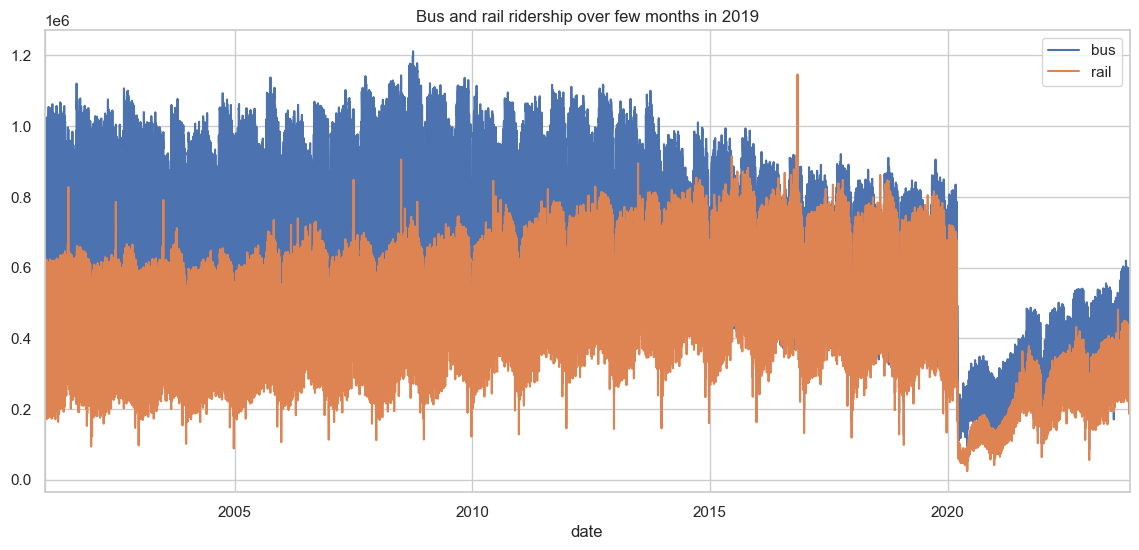

In [25]:
# Ridership didn't recover after covid-19
# One readon might be that more people are now working from home
fig, ax = plt.subplots(figsize=(14, 6))
df['2001-01':'2023-12'].plot(ax=ax)
ax.set_title('Bus and rail ridership over few months in 2019')
plt.show()


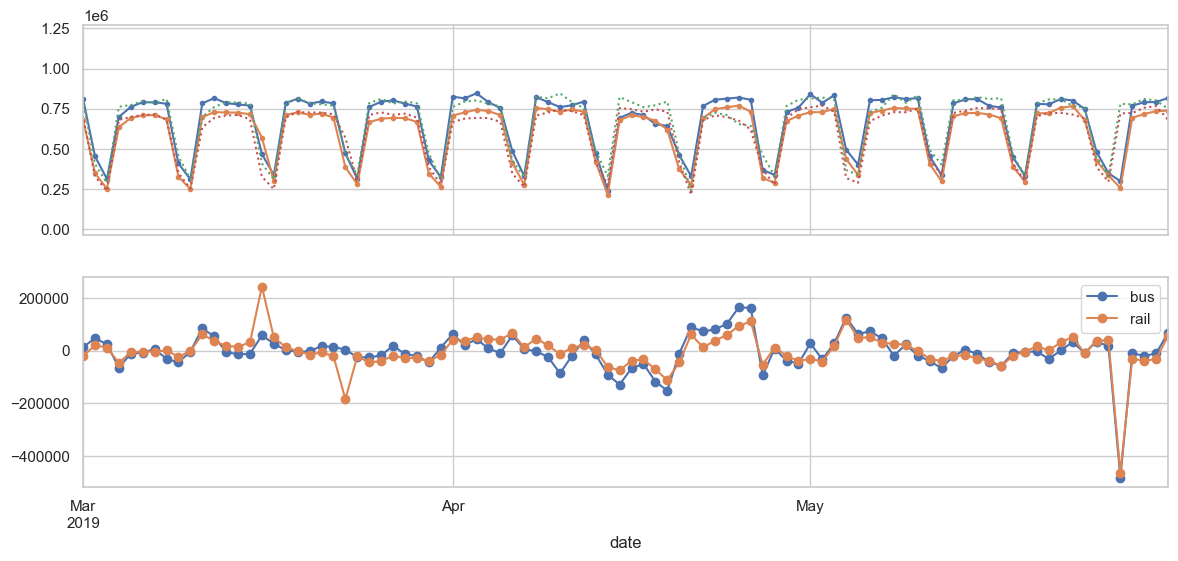

In [27]:
# Naive Forecasting
# The simplest way to forecast a time series is to use the value from the previous time step.

# Create a new column for the previous week's bus ridership
diff_7 = df[['bus', 'rail']].diff(7)['2019-03': '2019-05']

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
df.plot(ax=ax[0], legend=False, marker='.') # Original time series
df.shift(7).plot(ax=ax[0], grid=True, legend=False, linestyle=':') # lagged time series
diff_7.plot(ax=ax[1], grid=True, marker='o') # 7-days difference time series
plt.show()

In [45]:
# Seasonal Autoregressive Integrated Moving Average (SARIMA) model
from statsmodels.tsa.arima.model import ARIMA

origin, today = "2019-01-01", "2019-05-31"
rail_serires = df.loc[origin:today]['rail'].asfreq('D')
model = ARIMA(rail_serires, order=(1, 0, 0), seasonal_order=(0, 1, 1, 7))
model = model.fit()
y_pred = model.forecast()
y_pred

2019-06-01    427758.626286
Freq: D, dtype: float64